Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',100)
import re 
import string
import nltk
import time
import matplotlib.pyplot as plt
from nltk.corpus import stopwords as nltk_stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


Анализируемые данные представляют собой таблицу, где в одном столбце содержатся комментарии, а в другом - характеристика является ли комментарий негативным - наш целевой признак: 1 - негативный комментарий, 0 - нет.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Посмотрим на сбалансированность целевого признака.

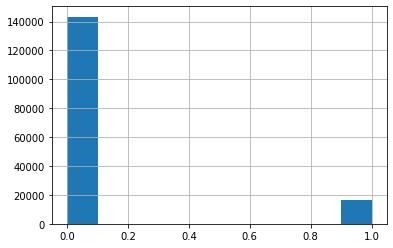

0    0.898321
1    0.101679
Name: toxic, dtype: float64

In [4]:
data['toxic'].hist()
plt.show(), \

data['toxic'].value_counts(normalize=True)

Как видно из графика целевой признак несбалансирован: количество всех негативных комментариев составляет 10% всех данных.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Пробавал какие-то другие варианты? Как меняется результат?
</div>

<div class="alert alert-block alert-info">

Спасибо за ревью! Отдельно в колабе пробовал применить BERT без балансировки классов, F1 около 0.46 вышло. Видимо что-то не докрутил, поэтому решил обратиться к даунсемплингу, вроде бы данных для этого достаточно.

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Похвально, что попробовал берт) С ним не всегда всё получается сразу, но это и тема гораздо сложнее)
</div>

In [5]:
#class_count_0, class_count_1 = data['toxic'].value_counts()

# Разделим классы
#class_0 = data[data['toxic'] == 0]
#class_1 = data[data['toxic'] == 1]

#class_0_under = class_0.sample(class_count_1)

#data_balanced = pd.concat([class_0_under, class_1], axis=0)

#print("total class of 1 and0:",data_balanced['toxic'].value_counts())
#data_balanced['toxic'].value_counts().plot(kind='bar', title='count (target)')

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Делать мы должны это после разделения выборки на тест и трейн. Ведь в честно тесте у нас баланса классов не будет. Вспомни 6 проект
</div>

Теперь необходимо обработать комментарии, для этого:
- приведём текст к нижнему регистру,
- уберём все знаки препинания, числа и лишние символы,
- лемматизируем текст.

In [6]:
def clear_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', ' ', text).split()
    clean_text = " ".join(text) 
    return clean_text

data['clean_text'] = data['text'].apply(clear_text)
data.head()

,text,toxic,clean_text
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,explanation why the edits made under my username hardcore metallica fan were reverted they weren...
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,daww he matches this background colour im seemingly stuck with thanks talk january utc
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,hey man im really not trying to edit war its just that this guy is constantly removing relevant ...
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0,more i cant make any real suggestions on improvement i wondered if the section statistics should...
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,you sir are my hero any chance you remember what page thats on


<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
В 0,2,4 строках ведь видно, что мы не полностью очистили текст. Пожалуйста исправь
</div>

In [7]:
# Создадим столбец с леммами слов в комментариях
lemmatizer = WordNetLemmatizer()
lemm_list = data['clean_text'].apply(lambda x: nltk.word_tokenize(x))

data['lemm_text'] = lemm_list.str.join(" ") 
data.head()

,text,toxic,clean_text,lemm_text
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,explanation why the edits made under my username hardcore metallica fan were reverted they weren...,explanation why the edits made under my username hardcore metallica fan were reverted they weren...
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,daww he matches this background colour im seemingly stuck with thanks talk january utc,daww he matches this background colour im seemingly stuck with thanks talk january utc
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,hey man im really not trying to edit war its just that this guy is constantly removing relevant ...,hey man im really not trying to edit war its just that this guy is constantly removing relevant ...
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0,more i cant make any real suggestions on improvement i wondered if the section statistics should...,more i cant make any real suggestions on improvement i wondered if the section statistics should...
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,you sir are my hero any chance you remember what page thats on,you sir are my hero any chance you remember what page thats on


В презультате обработки получили столбец с леммами слов. Далее применим метод TF-IDF для векторизации текстов.

In [8]:
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords) 

## Обучение

Все комментарии обработаны и готовы для построения моделей. Для сравнения построим несколько моделей, в качестве метрики качества будем использовать F1.

In [9]:
X = data['lemm_text']
y = data['toxic']
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127656,), (31915,), (127656,), (31915,))

In [10]:
X_train = count_tf_idf.fit_transform(x_train)
X_test = count_tf_idf.transform(x_test)
X_train.shape, X_test.shape

((127656, 187742), (31915, 187742))

### Logistic Regression

In [11]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
logreg_f1_score = f1_score(y_test, predictions)
logreg_f1_score

0.745872801082544

In [12]:
start_time = time.time()

param_grid = {
    'C': np.arange(1, 3, 0.2),
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000]
}

lr = LogisticRegression(class_weight='balanced')
grid = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3, verbose = False)
grid.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(grid.best_params_)

KeyboardInterrupt: 

In [15]:
logreg = LogisticRegression(class_weight='balanced', C=2.8, max_iter = 1000, penalty = 'l1')
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
logreg_f1_score = f1_score(y_test, predictions)
logreg_f1_score

0.7598981900452491

### Random Forest

In [16]:
start_time = time.time()

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
forest_f1_score = f1_score(y_test, predictions)

print("--- %s seconds ---" % (time.time() - start_time))
print(forest_f1_score)

--- 86.708247423172 seconds ---
0.6673132880698351


In [17]:
start_time = time.time()

forest = RandomForestClassifier(class_weight='balanced')
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
forest_f1_score_2 = f1_score(y_test, predictions)

print("--- %s seconds ---" % (time.time() - start_time))
print(forest_f1_score_2)

--- 97.95596218109131 seconds ---
0.5698113207547171


In [ ]:
start_time = time.time()

param_grid = {
    'n_estimators': [10,100,1000],
    'max_depth': range(2,9)}

rf = RandomForestClassifier(class_weight='balanced')
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = False)
grid.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
best_params_forest = grid.best_params_

In [ ]:
best_params_forest

In [18]:
start_time = time.time()

forest = RandomForestClassifier(max_depth = 8, n_estimators = 1000, class_weight='balanced')
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
forest_f1_score = f1_score(y_test, predictions)

print("--- %s seconds ---" % (time.time() - start_time))
print(forest_f1_score)

--- 54.18673896789551 seconds ---
0.35951376204572655


<div class="alert alert-danger">
    
**Комментарий ревьюера v_2**
     
Как тут получился 0? Попробуй разобраться сам, если не найдешь, помогу)
</div>

<div class="alert alert-block alert-info">

Кроме того, что данные несбалансированы, не знаю почему 0 выходит. Если проставляю class_weight метрика хуже становится.

### CatBoost

In [19]:
cw = [1,(data['toxic']==0).sum() / (data['toxic']==1).sum()]

In [ ]:
catboost = CatBoostClassifier(verbose=200)
catboost.fit(X_train, y_train)
predictions = catboost.predict(X_test)
cat_f1_score = f1_score(y_test, predictions)
cat_f1_score

Learning rate set to 0.06609
0:	learn: 0.6252148	total: 6.69s	remaining: 1h 51m 25s
200:	learn: 0.1637224	total: 19m 1s	remaining: 1h 15m 37s


In [ ]:
catboost = CatBoostClassifier(verbose=200,
                              early_stopping_rounds=200,
                              eval_metric='F1',
                              class_weights=cw)
catboost.fit(X_train, y_train)
prediction = catboost.predict(X_test)
cat_score_test = f1_score(y_test, prediction)
cat_score_test

<div class="alert alert-danger">
    
**Комментарий ревьюера v_2**
     
По сути, здесь ты подбираешь гиперпараметры на тесте, так делать не стоит.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Обучение сделал верно, молодец!)
</div>

## Выводы

В рамках работы над задачей токсичных комментарией пользователей интернет-магазина «Викишоп», было построено три модели: Логистическая регрессия, случайный лес и кэтбуст. В качестве метрики для оценки эффективности классификации комментариев на обычные и токсичные используем F1-score. Среди трёх моделей наилучшего значения метрики удалось добиться для Логистической регрессии- значение метрики **F1 = 0.7598**

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Чтобы я мог принять проект пожалуйста исправь замечания и достигни нужно результат. Если есть вопросы или нужна помощь, я всегда рад)
    
P.S. Принимаются пожелания по доп материалам))
</div>

<div class="alert alert-block alert-info">

Не получается настроить параметры, чтобы необходимое значение метрики получить. В этом проекте вообще реально, только используя TFIDF, метрики достичь, или нужно ещё другие методы применить?  
P.S. по какой-то причине этот же код выдаёт в Колабе лучшие метрики.

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Я думаю дело в 10% выборки, просто тебе досталась не очень удачная) В целом, с tfifd даже полный объем отработает) Чтобы было быстрее гиперпараметры можно подобрать в колабе)Если есть еще вопросы, всегда рад) 
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_3**
     
Кирилл, спасибо за работу) Это очень большая и довольно сложная тема. Если она тебя заинтересовала и ты бы хотел еще доработать проект, присылай мне его через куратора. Мы разберем с тобой всё глубже.

Ниже материалы для 14 проекта) Рад был знакомству! Успехов в следующих проектах)
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны